<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/NLP_document_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Document Classification

---
Data pre-processing: text -> (CounterVectorizer) -> DTM (document term matrix)


## data (20 news)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

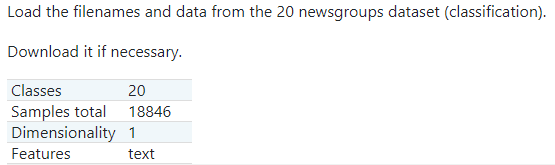

In [15]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups()
x = news.data
y = news.target

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7919, 130107) (3395, 130107) (7919,) (3395,)


In [18]:
print(X_train[0]) 

  (0, 56979)	2
  (0, 85354)	1
  (0, 111322)	1
  (0, 68532)	7
  (0, 114731)	2
  (0, 90379)	1
  (0, 89362)	10
  (0, 76032)	1
  (0, 65798)	1
  (0, 114579)	2
  (0, 42876)	2
  (0, 89860)	2
  (0, 114455)	20
  (0, 90686)	2
  (0, 68766)	5
  (0, 115475)	4
  (0, 32311)	1
  (0, 123796)	2
  (0, 66608)	10
  (0, 37565)	3
  (0, 128026)	1
  (0, 63363)	1
  (0, 128402)	5
  (0, 62221)	4
  (0, 35983)	1
  :	:
  (0, 56206)	1
  (0, 112080)	1
  (0, 62090)	1
  (0, 72661)	3
  (0, 25726)	1
  (0, 29112)	1
  (0, 89170)	2
  (0, 96226)	1
  (0, 118867)	1
  (0, 46560)	4
  (0, 79107)	2
  (0, 121153)	1
  (0, 89283)	1
  (0, 36576)	1
  (0, 6906)	1
  (0, 117896)	1
  (0, 56770)	1
  (0, 52699)	1
  (0, 87715)	2
  (0, 83503)	1
  (0, 36888)	1
  (0, 76318)	1
  (0, 94494)	1
  (0, 100492)	1
  (0, 67098)	1


## Model


1.   Logistic Regression
2.   SVM
3.   Naive Bayes
4. Decision Tree
5. XGBoost


### Logistic Regression


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
acc

0.8645066273932254

### SVM (support vector machines)

클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터라고함

각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습

서포트 벡터 까지의 거리와 서포트 벡터의 중요도를 기반으로 예측 수행

In [21]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
acc

0.8179675994108984

### Naive Bayes Classification

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
acc

0.8164948453608247

performance improvement with tf-idf

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.fit_transform(X_test)
model.fit(X_train_tf, y_train)
pred = model.predict(X_test_tf)
acc = accuracy_score(pred, y_test)
acc

0.8288659793814434

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
acc

0.625920471281296

### XGBoost

In [25]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=30, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
acc

0.7069219440353461

## cross-validation

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.fit_transform(X_test)
model = MultinomialNB()
model.fit(X_train_tf, y_train)
pred = model.predict(X_test_tf)
acc = accuracy_score(pred, y_test)
acc

0.8288659793814434

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(scores, scores.mean())

[0.83870968 0.83826779 0.82368537 0.83031374 0.83642794] 0.833480903927519


## precision and recall

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(pred, y_test, average='micro')
recall = recall_score(pred, y_test, average='micro')
f1 = f1_score(pred, y_test, average='micro')
print(precision, recall, f1)

0.8288659793814434 0.8288659793814434 0.8288659793814434


## parameter optimization using grid search

In [30]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator=model, param_grid={'alpha': [0.001, 0.01, 0.1, 1.]}, scoring='accuracy', cv=10)
GS.fit(x, y)

print(GS.best_score_)
print(GS.best_params_)

0.8897820965842167
{'alpha': 0.001}


In [31]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator=model, 
                  param_grid={'alpha': [0.0006, 0.0007, 0.0008, 0.0009, 
                                        0.001, 
                                        0.002, 0.003, 0.004, 0.005]}, 
                  scoring='accuracy', cv=10)
GS.fit(x, y)

print(GS.best_score_)
print(GS.best_params_)

0.8897820965842167
{'alpha': 0.001}
